A database for hand gesture recognition is introduced, consisting of a collection of near-infrared images captured using the Leap Motion sensor.

# Database Contents

This database is composed by 10 different hand gestures made by 10 different people.(5 men and 5 women)

In [16]:
import warnings
warnings.filterwarnings('ignore')

import keras
import matplotlib.pyplot as plt # for plotting
import os # provides a way of using operating system dependent functionality
import cv2 #Image handling library
import numpy as np
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
# Import of keras model and hidden layers for our convolutional network
from keras.layers import Conv2D, Activation, MaxPool2D, Dense, Flatten, Dropout


Instructions for updating:
non-resource variables are not supported in the long term


In [17]:
CATEGORIES = ["01_palm", '02_l','03_fist','04_fist_moved','05_thumb','06_index','07_ok','08_palm_moved','09_c','10_down']
IMG_SIZE = 50

# paths for dataset
data_path = r"C:\Users\pnaka\Downloads\extracted_data\leapGestRecog\leapGestRecog"

# Extracting and Handling Data

In [18]:
image_data = []
for dr in os.listdir(data_path):
    for category in CATEGORIES:
        class_index = CATEGORIES.index(category)
        path = os.path.join(data_path, dr, category)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                image_data.append([cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE)), class_index])
            except Exception as e:
                pass
image_data[0]

[array([[5, 4, 4, ..., 3, 4, 2],
        [5, 4, 5, ..., 3, 3, 3],
        [4, 5, 4, ..., 4, 5, 3],
        ...,
        [4, 5, 5, ..., 5, 5, 5],
        [5, 5, 6, ..., 5, 7, 4],
        [4, 7, 5, ..., 5, 4, 4]], dtype=uint8),
 0]

In [19]:
import random
random.shuffle(image_data)

In [20]:
input_data = []
label = []
for X, y in image_data:
    input_data.append(X)
    label.append(y)


In [21]:
label[:10]

[1, 3, 5, 2, 5, 1, 9, 6, 0, 9]

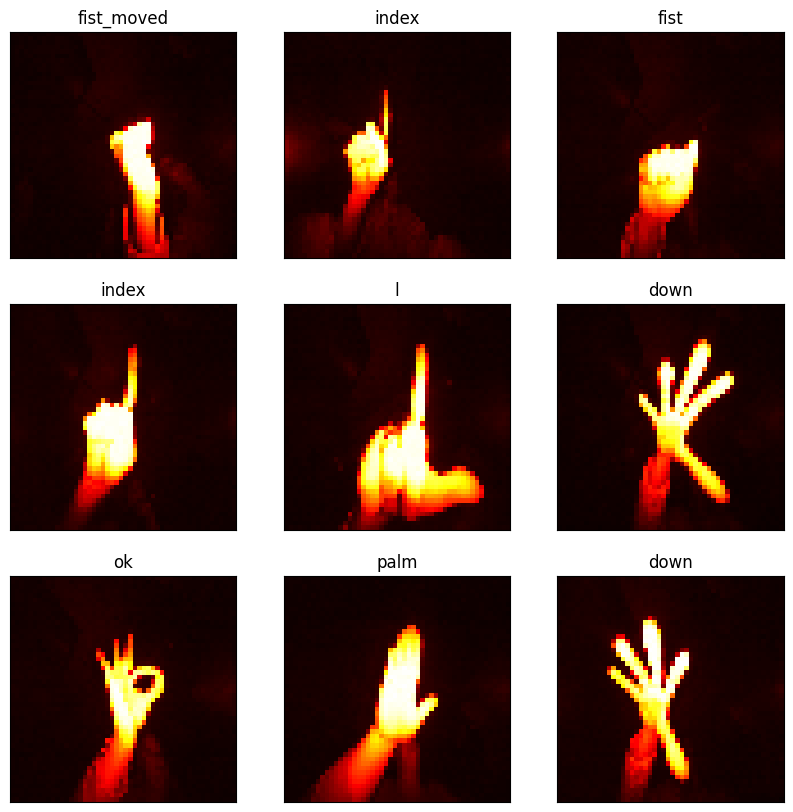

In [22]:
plt.figure(1, figsize=(10,10))
for i in range(1,10):
    plt.subplot(3,3,i)
    plt.imshow(image_data[i][0], cmap='hot')
    plt.xticks([])
    plt.yticks([])
    plt.title(CATEGORIES[label[i]][3:])
plt.show()

In [23]:
# Normalizing the data
input_data = np.array(input_data)
label = np.array(label)
input_data = input_data/255.0
input_data.shape

(20000, 50, 50)

In [24]:
label = keras.utils.to_categorical(label, num_classes=10,dtype='i1')
label[0]

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int8)

In [25]:
# reshaping the data
input_data.shape = (-1, IMG_SIZE, IMG_SIZE, 1)

In [26]:
# splitting the input_data to train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(input_data, label, test_size = 0.3, random_state=0)

# Training the Model:

In [27]:
model = keras.models.Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3,3), input_shape = (IMG_SIZE, IMG_SIZE, 1)))
model.add(Activation('relu'))


model.add(Conv2D(filters = 32, kernel_size = (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 64, kernel_size = (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer = 'rmsprop',
             metrics = ['accuracy'])

In [28]:
model.fit(X_train, y_train, epochs = 7, batch_size=32, validation_data=(X_test, y_test))



Train on 14000 samples, validate on 6000 samples
Epoch 1/7
14000/14000 [==============================] - 19s 1ms/sample - loss: 0.3249 - acc: 0.8949 - val_loss: 0.0108 - val_acc: 0.9978
Epoch 2/7
14000/14000 [==============================] - 19s 1ms/sample - loss: 0.0176 - acc: 0.9950 - val_loss: 0.0208 - val_acc: 0.9938
Epoch 3/7
14000/14000 [==============================] - 20s 1ms/sample - loss: 0.0078 - acc: 0.9976 - val_loss: 0.0037 - val_acc: 0.9993
Epoch 4/7
14000/14000 [==============================] - 22s 2ms/sample - loss: 0.0052 - acc: 0.9986 - val_loss: 0.0089 - val_acc: 0.9992
Epoch 5/7
14000/14000 [==============================] - 22s 2ms/sample - loss: 0.0042 - acc: 0.9992 - val_loss: 0.0063 - val_acc: 0.9988
Epoch 6/7
14000/14000 [==============================] - 22s 2ms/sample - loss: 0.0021 - acc: 0.9992 - val_loss: 0.0163 - val_acc: 0.9970
Epoch 7/7
14000/14000 [==============================] - 22s 2ms/sample - loss: 0.0032 - acc: 0.9991 - val_loss: 0.0069 -

In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 48, 48, 32)        320       
                                                                 
 activation_3 (Activation)   (None, 48, 48, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 46, 46, 32)        9248      
                                                                 
 activation_4 (Activation)   (None, 46, 46, 32)        0         
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 23, 23, 32)        0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 23, 23, 32)        0         
                                                      

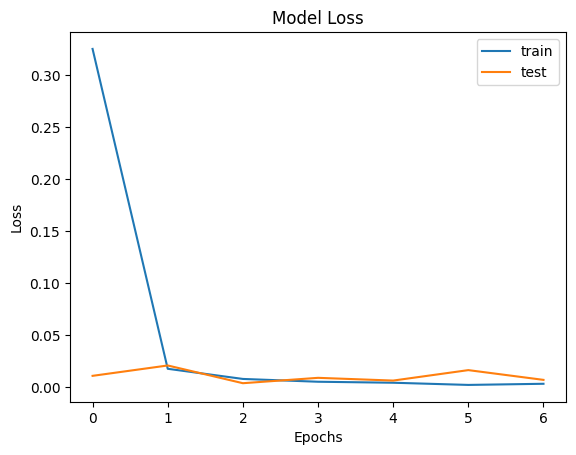

In [30]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

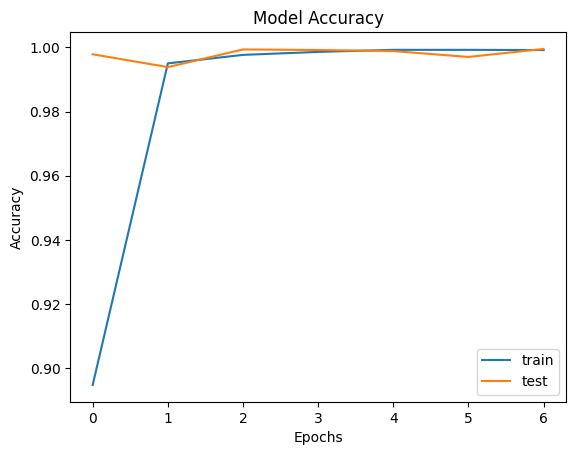

In [33]:
plt.plot(model.history.history['acc'])
plt.plot(model.history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [34]:
#calculate loss and accuracy on test data

test_loss, test_acc = model.evaluate(X_test, y_test)

print('Test accuracy: {:2.2f}%'.format(test_acc*100))

Test accuracy: 99.95%


## Confusion Matrix

[]

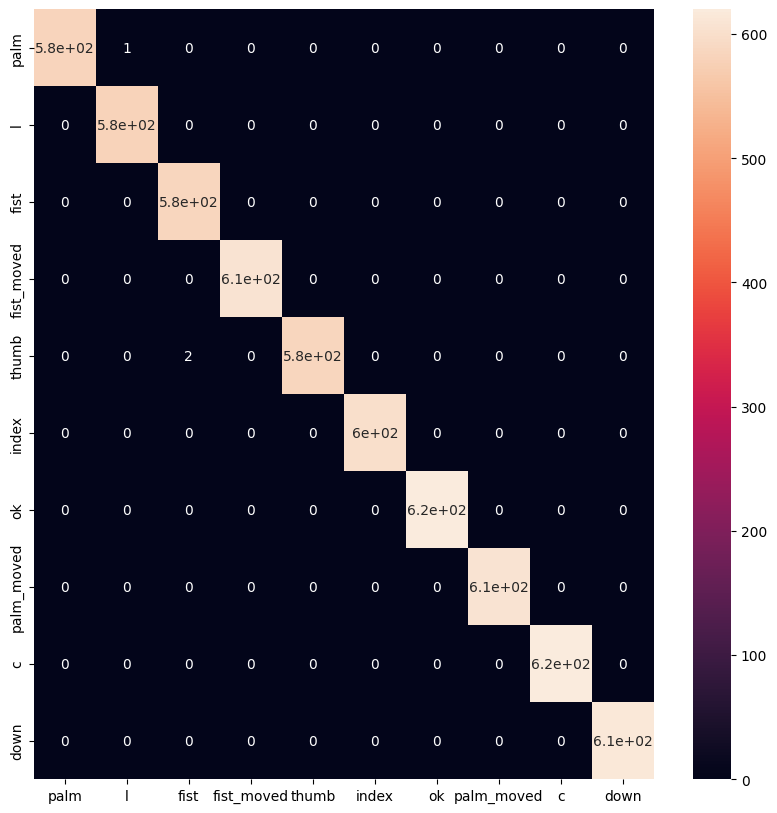

In [35]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
cat = [c[3:] for c in CATEGORIES]
plt.figure(figsize=(10,10))
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(model.predict(X_test), axis=1))
sn.heatmap(cm, annot=True,xticklabels=cat, yticklabels=cat)
plt.plot()
[]

Thus we have successfully created a machine learning model that can use images of hand gestures and categorize them.We trained the model and compared the loss and accuracy aswell as the number of epochs and accuracy.We were able to determine the accuracy of the model to be 99.95%.Based on each gesture the model was able to categorize all the available samples into a set of generated images.

In [ ]:
Thank you.